In [1]:
import pandas as pd
import numpy as np
import pylab as pl

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
tng_photo  = pd.read_csv('./data/tng_features.csv').drop(['Unnamed: 0'], axis=1)
sdss_photo = pd.read_csv('./data/stellar_sdss_phot.csv').drop(['Unnamed: 0'], axis=1)
tweb_df = pd.read_csv('./data/tweb_cw_grid256_rcellsize.csv').drop(['Unnamed: 0'], axis=1)

In [3]:
df = pd.merge(tng_photo, tweb_df, on='ID')
df = pd.merge(sdss_photo, df, on='ID')
df

,ID,sdss_Mu,sdss_Mg,sdss_Mr,sdss_Mi,sdss_Mz,galaxy_class,pos_x,pos_y,pos_z,...,tng_Mz,star_metallicity,veldisp,sfr,flag,lambda1,lambda2,lambda3,delta,Environment
0,0.0,-19.918682,-21.427780,-22.115793,-22.478964,-22.796307,1.0,20130.394531,47349.105469,48801.187500,...,-24.677780,0.013450,502.348389,14.369511,1.0,1.954429,2.364169,3.441389,18.383154,0.0
1,1.0,-20.797749,-22.592024,-23.387402,-23.785805,-24.137964,1.0,20396.642578,48362.144531,48838.035156,...,-25.406290,0.024715,439.413666,0.368309,1.0,0.789115,1.492771,2.197094,8.225636,0.0
2,2.0,-21.605118,-22.969065,-23.532661,-23.849113,-24.145828,0.0,20295.615234,46623.386719,49167.097656,...,-24.955791,0.026480,323.013428,16.710186,1.0,0.310030,1.676064,2.537851,8.691577,0.0
3,3.0,-20.388245,-21.703148,-22.265253,-22.584154,-22.873615,0.0,18736.601562,48797.214844,49059.656250,...,-23.318478,0.022510,164.921753,3.290016,1.0,0.073656,0.907090,1.220985,4.218541,0.0
4,4.0,-19.744356,-21.458693,-22.222290,-22.607536,-22.939856,1.0,19634.787109,46360.535156,48662.789062,...,-23.505751,0.022659,191.186371,0.001781,1.0,-0.204095,1.108912,1.627283,1.236518,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364511,4490245.0,-7.376702,-8.596647,-9.148641,-9.423900,-9.556947,0.0,44448.542969,34485.988281,30202.750000,...,-9.575764,0.000000,6.852405,0.000000,1.0,0.013480,0.265502,0.477688,0.304635,0.0
364512,4493007.0,-7.929919,-9.245331,-9.829266,-10.115916,-10.286570,0.0,52411.878906,71483.054688,17944.683594,...,-10.352871,0.000000,3.944225,0.000000,1.0,-0.236132,0.278761,0.338984,-0.161306,1.0
364513,4514472.0,-8.059139,-9.316813,-9.870451,-10.172428,-10.342423,0.0,68211.531250,23783.765625,24512.123047,...,-10.383102,0.000000,3.719493,0.000000,1.0,0.027842,0.042858,0.175058,-0.906812,0.0
364514,4520126.0,-7.635355,-9.033590,-9.685241,-10.004305,-10.200866,1.0,67657.234375,6622.445801,38314.156250,...,-10.267644,0.000000,9.043399,0.000000,1.0,-0.151007,0.164176,0.290989,-0.534059,1.0


In [4]:
%%time
predictors = ['tng_MU', 'tng_MB', 'tng_MV', 'tng_MK', 'tng_Mg', 'tng_Mr', 'tng_Mi', 'tng_Mz']
data = df[predictors]
data = StandardScaler().fit_transform(data)

model = TSNE(n_components=2)
projection = model.fit_transform(data)

/global/common/software/desi/perlmutter/desiconda/20220119-2.0.1/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/global/common/software/desi/perlmutter/desiconda/20220119-2.0.1/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: user 1h 27min 56s, sys: 2min 31s, total: 1h 30min 27s
Wall time: 1h 38min 1s


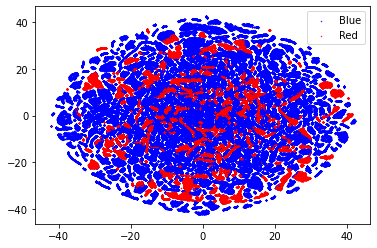

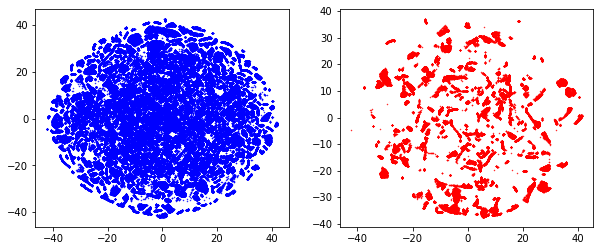

In [5]:
pl.scatter(projection[:,0][df['galaxy_class']==0], projection[:,1][df['galaxy_class']==0], label='Blue', color='b', s=0.2)
pl.scatter(projection[:,0][df['galaxy_class']==1], projection[:,1][df['galaxy_class']==1], label='Red', color='r', s=0.2)
pl.legend()
pl.show()

fig = pl.figure(figsize=(10,4))
pl.subplot(1,2,1)
pl.scatter(projection[:,0][df['galaxy_class']==0], projection[:,1][df['galaxy_class']==0], label='Blue', color='b', s=0.2)
pl.subplot(1,2,2)
pl.scatter(projection[:,0][df['galaxy_class']==1], projection[:,1][df['galaxy_class']==1], label='Red', color='r', s=0.2)
pl.show()

In [ ]:
%%time
predictors = ['sdss_Mu', 'sdss_Mg', 'sdss_Mr', 'sdss_Mi', 'sdss_Mz']
data = df[predictors]
data = StandardScaler().fit_transform(data)

model = TSNE(n_components=2)
projection = model.fit_transform(data)

/global/common/software/desi/perlmutter/desiconda/20220119-2.0.1/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/global/common/software/desi/perlmutter/desiconda/20220119-2.0.1/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
pl.scatter(projection[:,0][df['galaxy_class']==0], projection[:,1][df['galaxy_class']==0], label='Blue', color='b', s=0.2)
pl.scatter(projection[:,0][df['galaxy_class']==1], projection[:,1][df['galaxy_class']==1], label='Red', color='r', s=0.2)
pl.legend()
pl.show()

fig = pl.figure(figsize=(10,4))
pl.subplot(1,2,1)
pl.scatter(projection[:,0][df['galaxy_class']==0], projection[:,1][df['galaxy_class']==0], label='Blue', color='b', s=0.2)
pl.subplot(1,2,2)
pl.scatter(projection[:,0][df['galaxy_class']==1], projection[:,1][df['galaxy_class']==1], label='Red', color='r', s=0.2)
pl.show()

In [ ]:
model.n_components_